# Nonlinear Equations

We want to find a root of the nonlinear function $f$ using different methods.

1. Bisection method
2. Newton method
3. Chord method
4. Secant method
5. Fixed point iterations





In [29]:
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
import sympy as sym
import math as m


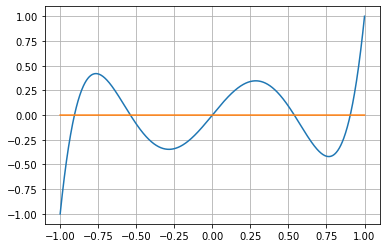

In [2]:
t = sym.symbols('t')

f_sym = t/8. * (63.*t**4 - 70.*t**2. +15.) # Legendre polynomial of order 5

f_prime_sym = sym.diff(f_sym,t)

f = sym.lambdify(t, f_sym, 'numpy')
f_prime = sym.lambdify(t,f_prime_sym, 'numpy')

phi = lambda x : 63./70.*x**3 + 15./(70.*x)
#phi = lambda x : 70.0/15.0*x**3 - 63.0/15.0*x**5
#phi = lambda x : sqrt((63.*x**4 + 15.0)/70.)

# Let's plot
n = 1025

x = linspace(-1,1,n)
c = zeros_like(x)

_ = plot(x,f(x))
_ = plot(x,c)
_ = grid()


In [97]:
# Initial data for the variuos algorithms

# interval in which we seek the solution 
a = 0.7
b = 1.

# initial points
x0 = (a+b)/2.0
x00 = b


In [104]:
# stopping criteria
eps = 1e-10
n_max = 1000
verbose = True
err_type = 1

## Bisection method

$$
x^k = \frac{a^k+b^k}{2}
$$
```
                   if (f(a_k) * f(x_k)) < 0:
                      b_k1 = x_k
                      a_k1 = a_k
                   else:
                      a_k1 = x_k
                      b_k1 = b_k
```

max it for first criterion: 32
[a, b]: [0.7, 1.0] tolerance: 1e-10 max iterations: 1000
stopped at iteration: 32
x: 0.9061798459501006
error: 7.857261621871514e-11
CPU times: user 47.3 ms, sys: 168 µs, total: 47.5 ms
Wall time: 44.3 ms


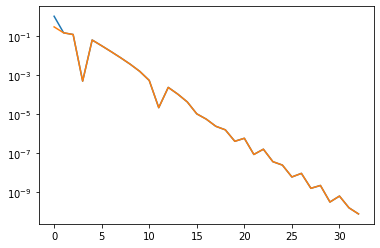

In [105]:
def bisect(f, a, b, eps, n_max):
    print(f"[a, b]: [{a}, {b}] tolerance: {eps} max iterations: {n_max}")
    assert f(a)*f(b) < 0
    a_new = a
    b_new = b
    x = mean([a,b])
    err = eps + 1.
    errors = [err]
    it = 0

    if verbose:
        fxs = [abs(f(x))]
    
    while err > eps and it < n_max:
        if f(a_new) * f(x) < 0:
            # root in (a_new,x)
            b_new = x
        else:
            # root in (x,b_new)
            a_new = x
        
        x_new = mean([a_new, b_new])
        
        if err_type == 0:
            #this err goes (b-a) / 2**(it + 1)
            # -> it = log((b - a) / eps, 2)
            err = 0.5 *(b_new - a_new)
        elif err_type == 1:
            #cannot predict
            err = abs(f(x_new))
        else:
            #it's the same as the first, but with extra steps?
            err = abs(x - x_new)
        
        errors.append(err)
        x = x_new
        if verbose:
            fxs.append(abs(f(x)))
        it += 1
    
    semilogy(errors)
    #semilogy([2*e for e in errors])
    if verbose:
        semilogy(fxs)
    print(f"stopped at iteration: {it}")
    print(f"x: {x}")
    print(f"error: {err}")
    return errors

print(f"max it for first criterion: {m.ceil(m.log((b - a) / eps, 2))}")

%time errors_bisect = bisect(f, a, b, eps, n_max)

#CPU times: user 26.4 ms, sys: 0 ns, total: 26.4 ms
#Wall time: 24.1 ms


In [ ]:
# is the number of iterations coherent with the theoretical estimation?

In order to find out other methods for solving non-linear equations, let's compute the Taylor's series of $f(x^k)$ up to the first order 

$$
f(x^k) \simeq f(x^k) + (x-x^k)f^{\prime}(x^k)
$$
which suggests the following iterative scheme
$$
x^{k+1} = x^k - \frac{f(x^k)}{f^{\prime}(x^k)}
$$

The following methods are obtained applying the above scheme where

$$
f^{\prime}(x^k) \approx q^k
$$

## Newton's method
$$
q^k = f^{\prime}(x^k)
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

x0: 1.0 tolerance: 1e-10 max iterations: 1000
stopped at iteration: 5
x: 0.9061798459386647
error: 5.633945684709343e-15
CPU times: user 80.8 ms, sys: 0 ns, total: 80.8 ms
Wall time: 80 ms


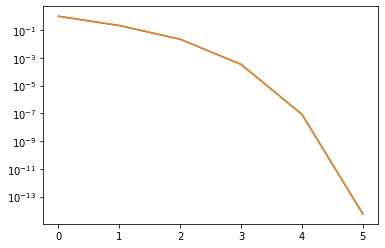

In [106]:
def newton(f, f_prime, x0, eps, n_max):
    print(f"x0: {x0} tolerance: {eps} max iterations: {n_max}")
    x = x0
    err = eps + 1.
    errors = [err]
    it = 0
    
    if verbose:
        fxs = [abs(f(x))]
    
    while err > eps and it < n_max:
        f_p = f_prime(x)
        #assert abs(f_p) > eps
        if abs(f_p) < eps:
            print("First derivative is zero")
            return None
        x_new = x - f(x) / f_p
        
        if err_type == 0:
            raise Exception
        elif err_type == 1:
            #cannot predict
            err = abs(f(x_new))
        else:
            #it's the same as the first, but with extra steps?
            err = abs(x - x_new)
        
        errors.append(err)
        x = x_new
        if verbose:
            fxs.append(abs(f(x)))
        it += 1
    
    semilogy(errors)
    if verbose:
        semilogy(fxs)
    print(f"stopped at iteration: {it}")
    print(f"x: {x}")
    print(f"error: {err}")
    return errors

#newton converges to unpredictable roots, so starting from a refined solution (eg, bisect)
#might converge to the nearest
%time errors_newton = newton(f, f_prime, 1.0, eps, n_max)

#bisect:
#CPU times: user 26.4 ms, sys: 0 ns, total: 26.4 ms
#Wall time: 24.1 ms
#newton:
#CPU times: user 23.6 ms, sys: 220 µs, total: 23.8 ms
#Wall time: 20.2 ms

## Chord method

$$
q^k \equiv q = \frac{f(b)-f(a)}{b-a}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q}
$$

[a, b]: [0.7, 1.0], x0: 0.85 tolerance: 1e-10 max iterations: 1000
q: 4.5506625
stopped at iteration: 31
x: 0.9061798459502479
error: 7.958511674322147e-11
CPU times: user 60.4 ms, sys: 3.77 ms, total: 64.2 ms
Wall time: 61.2 ms


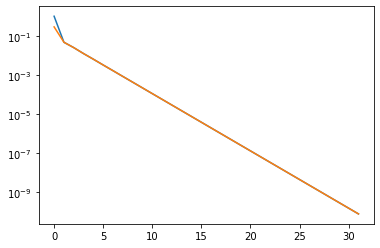

In [107]:
def chord(f, a, b, x0, eps, n_max):
    print(f"[a, b]: [{a}, {b}], x0: {x0} tolerance: {eps} max iterations: {n_max}")
    x = x0
    err = eps + 1.
    errors = [err]
    it = 0
    
    q = (f(b) - f(a)) / (b - a)
    print(f"q: {q}")
    
    if verbose:
        fxs = [abs(f(x))]
    
    while err > eps and it < n_max:
        x_new = x - f(x) / q
        
        if err_type == 0:
            raise Exception
        elif err_type == 1:
            #cannot predict
            err = abs(f(x_new))
        else:
            #it's the same as the first, but with extra steps?
            err = abs(x - x_new)
        
        errors.append(err)
        x = x_new
        if verbose:
            fxs.append(abs(f(x)))
        it += 1
    
    semilogy(errors)
    if verbose:
        semilogy(fxs)
    print(f"stopped at iteration: {it}")
    print(f"x: {x}")
    print(f"error: {err}")
    return errors

%time errors_chord = chord(f, a, b, x0, eps, n_max)

#bisect:
#CPU times: user 26.4 ms, sys: 0 ns, total: 26.4 ms
#Wall time: 24.1 ms
#newton:
#CPU times: user 23.6 ms, sys: 220 µs, total: 23.8 ms
#Wall time: 20.2 ms
#chord:
#CPU times: user 21.5 ms, sys: 87 µs, total: 21.6 ms
#Wall time: 19.9 ms

## Secant method

$$
q^k = \frac{f(x^k)-f(x^{k-1})}{x^k - x^{k-1}}
$$

$$
x^{k+1} = x^k - \frac{f(x^k)}{q^k}
$$

Note that this algorithm requirs **two** initial points

x0: 0.85 x00: 1.0 tolerance: 1e-10 max iterations: 1000
stopped at iteration: 7
x: 0.906179845938664
error: 0.0
CPU times: user 46.5 ms, sys: 112 µs, total: 46.6 ms
Wall time: 47.4 ms


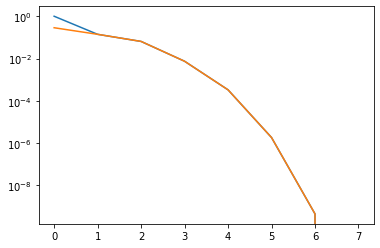

In [109]:
def secant(f, x0, x00, eps, n_max):
    print(f"x0: {x0} x00: {x00} tolerance: {eps} max iterations: {n_max}")
    x = x0
    x_ = x00
    err = eps + 1.
    errors = [err]
    it = 0
    
    if verbose:
        fxs = [abs(f(x))]
    
    while err > eps and it < n_max:
        fx = f(x)
        q = (fx - f(x_)) / (x - x_)
        x_new = x - fx / q
        
        if err_type == 0:
            err = abs(x - x_new)/2
        elif err_type == 1:
            #cannot predict
            err = abs(f(x_new))
        else:
            #it's the same as the first, but with extra steps?
            err = abs(x - x_new)
        
        errors.append(err)
        x, x_ = x_new, x
        if verbose:
            fxs.append(abs(f(x)))
        it += 1
    
    semilogy(errors)
    if verbose:
        semilogy(fxs)
    print(f"stopped at iteration: {it}")
    print(f"x: {x}")
    print(f"error: {err}")
    return errors
    
%time errors_secant = secant(f, x0, x00, eps, n_max)

## Fixed point iterations

$$
f(x)=0 \to x-\phi(x)=0
$$

$$
x^{k+1} = \phi(x^k)
$$

x0: 0.3 tolerance: 1e-10 max iterations: 1000
stopped at iteration: 10
x: 0.5384693101084483
error: 6.708269298482029e-12
CPU times: user 44.6 ms, sys: 246 µs, total: 44.8 ms
Wall time: 42 ms


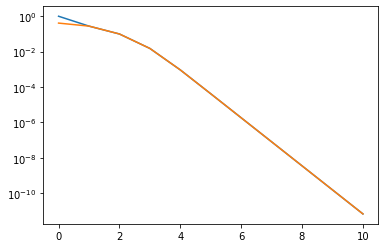

In [117]:
def fixed_point(phi, x0, eps, n_max):
    print(f"x0: {x0} tolerance: {eps} max iterations: {n_max}")
    x = phi(x0)
    err = eps + 1.
    errors = [err]
    it = 0
    
    if verbose:
        fxs = [abs(f(x))]
    
    while err > eps and it < n_max:
        x_new = phi(x)
        
        if err_type == 0:
            err = abs(x - x_new)/2
        elif err_type == 1:
            #cannot predict
            err = abs(f(x_new))
        else:
            #it's the same as the first, but with extra steps?
            err = abs(x - x_new)
        
        errors.append(err)
        x = x_new
        if verbose:
            fxs.append(abs(f(x)))
        it += 1
    
    semilogy(errors)
    if verbose:
        semilogy(fxs)
    print(f"stopped at iteration: {it}")
    print(f"x: {x}")
    print(f"error: {err}")
    return errors

%time errors_fixed = fixed_point(phi, 0.3, eps, n_max)
        

## Comparison

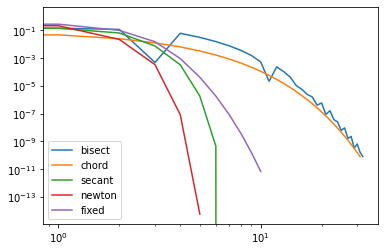

In [118]:
# plot the error convergence for the methods
loglog(errors_bisect, label='bisect')
loglog(errors_chord, label='chord')
loglog(errors_secant, label='secant')
loglog(errors_newton, label ='newton')
loglog(errors_fixed, label ='fixed')
_ = legend()

In [ ]:
# Let's compare the scipy implmentation of Newton's method with our..

In [92]:
import scipy.optimize as opt
%time opt.newton(f, 1.0, f_prime, tol = eps)

CPU times: user 2.82 ms, sys: 0 ns, total: 2.82 ms
Wall time: 2.85 ms


0.906179845938664